# EDA voor hardloop dataset door Jort Gommers

De data is waarschijnlijk verzameld door een formulier die hardlopers elke dag moesten invullen.
De data is in een github repository gezet zodat het altijd beschikbaar is.

De data bevat 2 files de eerste file hardloop.tsv gaat over wanneer er gehardlopen is hoelang er gehardlopen is en hoe intens het was.
Deze file heeft in totaal 9 koloms waarvan 1 lege met 32498 datums dat er haardgelopen is.
de 2 de file gaat over de blessures van de personenn in de periode dat ze aan het hardlopen waren.

Deze file heeft 11 koloms  met 61 blessures een groot gedeelte van deze dataset is leeg.


## Variablen 

Dit zijn de variablen voor de  files:

### hardloop.tsv
dates = datum hardgelopen
moment = moment van de dag hardgelopen ochtend of avond
TQR = mate van inspanning na hardlopen
RPE = een mate van hoe belastend het is tijdens het lopen
duration = hoelang die dag is hardgelopen
sleep = hoeveel er is geslapen die dag door de hardloper
person_id = de persoon waar het omgaat er zijn 24 personen.

### blessures.tsv
PERSON_ID = een persoonlijke ID per persoon.	
NAME = naam van de plek van de blessure 	
DIAGNOSE = De diagnose van de blessure door een professional	
DATE_START = moment dat de blessure startte 	
DATE_END =	moment dat de blessure stopte 
TIME_LOSS =	hoeveel dagen ze last hadden van de blessure 
LOCATION_INJURY = locatie van de blessure	
SIDE = kant van de locatie van de blessure indien nodig.	
TYPE =	altijd leeg maar waarschijnlijk hoord hier chronic of acute blessure te staan.
OCCURENCE =	hoe vaak het voorkwam
REMARKS =	nog enige informatie erbij.
ID = ID gekoppeld aan de persoon_id in de eerste file.


### informatie erbij

Heel veel van de waardes in blessures zijn leeg met name van location_injury tot remarks waarschijnlijk omdat de hardlopers het antwoord op deze vraag niet wisten.
Ook is er een aantal keer met vraagtekens geantwoord bij de diagnose of naam van de blessure wat de file niet mooier maakt maar wel nogsteeds belangrijk is voor het meenenmen.
Bij hardloop TSV zijn veel waardes leeg omdat er niet door de hardlopers 2 keer per dag is hardgelopen waardoor het geen nut heeft om daar een antwoord in te vullen.

In [5]:
import pandas as pd

# Bestandsnamen
file1 = '/homes/jrgommers/hardlopen_data/blessures.tsv'
file2 = '/homes/jrgommers/hardlopen_data/hardloop.tsv'

# Inlezen van de datasets
df1 = pd.read_csv(file1, sep='\t')  # Assuming the file is a tab-separated file (tsv)
df2 = pd.read_csv(file2, sep='\t')

# Afdrukken van de kop van de eerste dataset
print("Head van Dataset 1:")
print(df1.head())

# Afdrukken van de kop van de tweede dataset
print("\nHead van Dataset 2:")
print(df2.head())



Head van Dataset 1:
   PERSON_ID    NAME          DIAGNOSE DATE_START   DATE_END  TIME_LOSS  \
0          1  DRUNA1             Kuit   20-MAR-12  03-APR-12       14.0   
1          1  DRUNA1  voet(verstappen)  10-DEC-12  17-DEC-12        7.0   
2          1  DRUNA1              lies  24-MAR-13  30-SEP-13      190.0   
3         19  DRUNA2      Achillespees  03-OCT-11  23-DEC-11       81.0   
4         19  DRUNA2              Heup  22-MAR-12  12-JAN-13      296.0   

   LOCATION_INJURY SIDE TYPE OCCURENCE REMARKS  ID  
0             kuit  NaN  NaN       NaN     NaN   1  
1  voet (verstapt)  NaN  NaN       NaN     NaN   2  
2             lies  NaN  NaN       NaN     NaN   3  
3                ?  NaN  NaN       NaN     NaN   4  
4             heup  NaN  NaN       NaN     NaN   5  

Head van Dataset 2:
       DATES MOMENT   TQR   RPE  DURATION  SLEEP  PERSON_ID    ID  TQR_OF_RPE
0  30-APR-12      A   NaN   NaN       0.0    0.0        1.0  1973         NaN
1  30-APR-12      O  15.0  13.0   

Hierboven zie je in het kort de head van de tabellen en hoe ze er dus uitzien. er zijn ook heel veel NA's dus die moeten als eerste weg 

In [6]:
import pandas as pd

# Bestandsnamen
file1 = '/homes/jrgommers/hardlopen_data/blessures.tsv'
file2 = '/homes/jrgommers/hardlopen_data/hardloop.tsv'

# Inlezen van de datasets
df1 = pd.read_csv(file1, sep='\t')  # Assuming the file is a tab-separated file (tsv)
df2 = pd.read_csv(file2, sep='\t')

# Verwijder NaN-waarden uit de datasets
df1 = df1.dropna()
df2 = df2.dropna()

# Afdrukken van de kop van de eerste dataset zonder NaN-waarden
print("Head van Dataset 1 zonder NaN:")
print(df1.head())

# Afdrukken van de kop van de tweede dataset zonder NaN-waarden
print("\nHead van Dataset 2 zonder NaN:")
print(df2.head())


Head van Dataset 1 zonder NaN:
    PERSON_ID    NAME                DIAGNOSE DATE_START   DATE_END  \
11          2  DRUNE1  Onderbeen/Achillespees  09-NOV-11  22-DEC-11   
14          3  DRUNE2  Onderbeen/Achillespees  28-JAN-13  24-FEB-13   
20          4  DRUNF1               Heup/Lies  30-APR-13  26-AUG-13   
22          5  DRUNH1                    Knie  05-JAN-13  05-MAR-13   
28          6  DRUNJ1                  Scheen  21-MAR-13  21-JUL-13   

    TIME_LOSS         LOCATION_INJURY   SIDE                   TYPE  \
11       43.0  Onderbeen/achillespees  links           Peesblessure   
14       27.0  Onderbeen/achillespees  links    anders| Niet bekend   
20      118.0               Heup/Lies  Links     anders| Aspecifiek   
22       59.0                    Knie  Links  anders| overbelasting   
28      122.0                  scheen  links               fractuur   

        OCCURENCE                                            REMARKS  ID  
11  overbelasting  Hij heeft een halve-m

Hier zie je de data beter zonder de NAN's alleen dit is geen vaste oplossing voor de grafieken want dan mis je een stuk data die wel nodig is.
Zoals je ziet is dataset 2 leeg dit komt omdat er een column is met alleen NAN's en als sleep NAN's dan hoeft niet ook hardgelopen te hebben en die data gaat dan ook weg. dus de NAN's moeten blijven of vervangen worden door 0.

In [7]:
import pandas as pd

# Bestandsnamen
file1 = '/homes/jrgommers/hardlopen_data/blessures.tsv'
file2 = '/homes/jrgommers/hardlopen_data/hardloop.tsv'

# Inlezen van de datasets
df1 = pd.read_csv(file1, sep='\t')  # Assuming the file is a tab-separated file (tsv)
df2 = pd.read_csv(file2, sep='\t')

# Vervang NaN-waarden door 0 in de datasets
df1 = df1.fillna(0)
df2 = df2.fillna(0)

# Afdrukken van de kop van de eerste dataset met NaN-waarden vervangen door 0
print("Head van Dataset 1 met NaN vervangen door 0:")
print(df1.head())

# Afdrukken van de kop van de tweede dataset met NaN-waarden vervangen door 0
print("\nHead van Dataset 2 met NaN vervangen door 0:")
print(df2.head())


Head van Dataset 1 met NaN vervangen door 0:
   PERSON_ID    NAME          DIAGNOSE DATE_START   DATE_END  TIME_LOSS  \
0          1  DRUNA1             Kuit   20-MAR-12  03-APR-12       14.0   
1          1  DRUNA1  voet(verstappen)  10-DEC-12  17-DEC-12        7.0   
2          1  DRUNA1              lies  24-MAR-13  30-SEP-13      190.0   
3         19  DRUNA2      Achillespees  03-OCT-11  23-DEC-11       81.0   
4         19  DRUNA2              Heup  22-MAR-12  12-JAN-13      296.0   

   LOCATION_INJURY SIDE TYPE OCCURENCE REMARKS  ID  
0             kuit    0    0         0       0   1  
1  voet (verstapt)    0    0         0       0   2  
2             lies    0    0         0       0   3  
3                ?    0    0         0       0   4  
4             heup    0    0         0       0   5  

Head van Dataset 2 met NaN vervangen door 0:
       DATES MOMENT   TQR   RPE  DURATION  SLEEP  PERSON_ID    ID  TQR_OF_RPE
0  30-APR-12      A   0.0   0.0       0.0    0.0        1.0  1

Op deze manier kun je de code nog gebruiken voor grafieken.


### hoogste waarde
Hieronder kijk ik of er enkele uitschieters zijn met waarde om te kijken of alles geod is en wat de limieten zijn.

In [9]:
import pandas as pd

# Bestandsnamen
file1 = '/homes/jrgommers/hardlopen_data/blessures.tsv'
file2 = '/homes/jrgommers/hardlopen_data/hardloop.tsv'

# Inlezen van de datasets
df1 = pd.read_csv(file1, sep='\t')  # Assuming the file is a tab-separated file (tsv)
df2 = pd.read_csv(file2, sep='\t')

# Vervang NaN-waarden door 0 in de datasets
df1 = df1.fillna(0)
df2 = df2.fillna(0)

# Vind de hoogste waarde voor specifieke kolommen in Dataset 2
max_tqr = df2["TQR"].max()
max_rpe = df2["RPE"].max()
max_duration = df2["DURATION"].max()
max_sleep = df2["SLEEP"].max()

# Afdrukken van de hoogste waarde voor elke specifieke kolom in Dataset 2
print("Hoogste waarde voor 'TQR' in Dataset 2:", max_tqr)
print("Hoogste waarde voor 'RPE' in Dataset 2:", max_rpe)
print("Hoogste waarde voor 'DURATION' in Dataset 2:", max_duration)
print("Hoogste waarde voor 'SLEEP' in Dataset 2:", max_sleep)


Hoogste waarde voor 'TQR' in Dataset 2: 20.0
Hoogste waarde voor 'RPE' in Dataset 2: 20.0
Hoogste waarde voor 'DURATION' in Dataset 2: 1160.0
Hoogste waarde voor 'SLEEP' in Dataset 2: 120.0


Hier zien we dat TQR en RPE van 0-20 waarschijnlijk lopen. Duration is waarschijnlijk een fout want ik verwacht niet dat iemand 1160 minuten heeft hardgelopen.
Sleep is verwacht ik ook een fout want niemand slaapt 120 uur in 1 dag.

Hier moet ik met de begeleider over overleggen wat voor limieten hij wil hebben bij sleep en duration om fouten te voorkomen.

In [10]:
import pandas as pd

# Bestandsnamen
file1 = '/homes/jrgommers/hardlopen_data/blessures.tsv'
file2 = '/homes/jrgommers/hardlopen_data/hardloop.tsv'

# Inlezen van de datasets
df1 = pd.read_csv(file1, sep='\t')  # Assuming the file is a tab-separated file (tsv)
df2 = pd.read_csv(file2, sep='\t')

# Vervang NaN-waarden door 0 in de datasets
df1 = df1.fillna(0)
df2 = df2.fillna(0)

# Print informatie over de datasets
print("Informatie over Dataset 1:")
print(df1.info())

print("\nInformatie over Dataset 2:")
print(df2.info())


Informatie over Dataset 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PERSON_ID        60 non-null     int64  
 1   NAME             60 non-null     object 
 2   DIAGNOSE         60 non-null     object 
 3   DATE_START       60 non-null     object 
 4   DATE_END         60 non-null     object 
 5   TIME_LOSS        60 non-null     float64
 6   LOCATION_INJURY  60 non-null     object 
 7   SIDE             60 non-null     object 
 8   TYPE             60 non-null     object 
 9   OCCURENCE        60 non-null     object 
 10  REMARKS          60 non-null     object 
 11  ID               60 non-null     int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 5.8+ KB
None

Informatie over Dataset 2:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32497 entries, 0 to 32496
Data columns (total 9 columns):
 #   Column      Non-Nu

De meeste waarde zijn een float die misschien beter een int kunnen zijn bij dataset 2 hardlopen.tsv.
Sleep TQR RPE eb duration zijn namelijk getallen dit kan het best aangepast worden. 

Bij de rest is het meeste een object wat niet voor problemen hoeft te zorgen in de toekomst.

In [12]:
import pandas as pd

# Bestandsnamen
file1 = '/homes/jrgommers/hardlopen_data/blessures.tsv'
file2 = '/homes/jrgommers/hardlopen_data/hardloop.tsv'

# Inlezen van de datasets
df1 = pd.read_csv(file1, sep='\t')  # Assuming the file is a tab-separated file (tsv)
df2 = pd.read_csv(file2, sep='\t')



# Headers van file 2
headers_file2 = ["TQR", "RPE", "DURATION", "SLEEP"]

# Subset van file 2 met alleen de gewenste kolommen
df2_subset = df2[headers_file2]

# Vind het gemiddelde van elke kolom voor Dataset 2
average_values_df2 = df2_subset.mean()

# Afdrukken van het gemiddelde van elke kolom voor Dataset 2
print("\nGemiddelde van elke kolom voor Dataset 2:")
print(average_values_df2)



Gemiddelde van elke kolom voor Dataset 2:
TQR         14.337870
RPE         12.757787
DURATION    35.677369
SLEEP        5.105686
dtype: float64


### review gemiddelde's

Hierbij is de NAN niet 0 gemaakt omdat dat voor problemen zorgt. De gemiddelde zien er normaal uit dus er zijn niet extreem grote verschillen.

/tmp/ipykernel_1769097/1194201282.py:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(file_path, sep='\t', dayfirst=True, infer_datetime_format=True, quoting=3, quotechar='"', na_values=['', '""'])


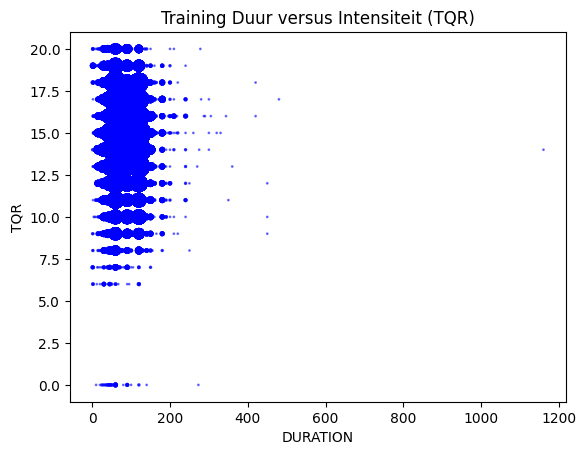

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'hardloop.tsv'

# Read the TSV file, specifying the date format for the 'DATES' column and handling quoting
df = pd.read_csv(file_path, sep='\t', dayfirst=True, infer_datetime_format=True, quoting=3, quotechar='"', na_values=['', '""'])

# Clean up column names by removing leading and trailing whitespaces and double quotes
df.columns = df.columns.str.strip().str.strip('"')

# Replace empty strings with NaN in the entire DataFrame
df.replace('', pd.NA, inplace=True)

# Drop rows with any missing values in the 'DATES' column
df = df.dropna(subset=['DATES'])

# Create a new column 'duration_tqr_pair' by combining 'DURATION' and 'TQR' columns
df['duration_tqr_pair'] = df['DURATION'].astype(str) + '_' + df['TQR'].astype(str)

# Group by 'duration_tqr_pair' and create a new column 'value_counts'
df['value_counts'] = df.groupby('duration_tqr_pair')['duration_tqr_pair'].transform('count')

# Fill NAs with 0s
df = df.fillna(0)

# Plot using matplotlib.scatter with transparency and blue color
plt.scatter(df[df['DURATION'] > 0]['DURATION'], df[df['DURATION'] > 0]['TQR'], c='blue', alpha=0.5, s=df[df['DURATION'] > 0]['value_counts'])

# Set plot title and labels
plt.title('Training Duur versus Intensiteit (TQR)')
plt.xlabel('DURATION')
plt.ylabel('TQR')

# Show the plot
plt.show()


Als je deze query runt krijg je een scatterplot te zien er moet nog iets 

/tmp/ipykernel_1769097/4234342354.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(file_path, sep='\t', dayfirst=True, infer_datetime_format=True, quoting=3, quotechar='"', na_values=['', '""'])


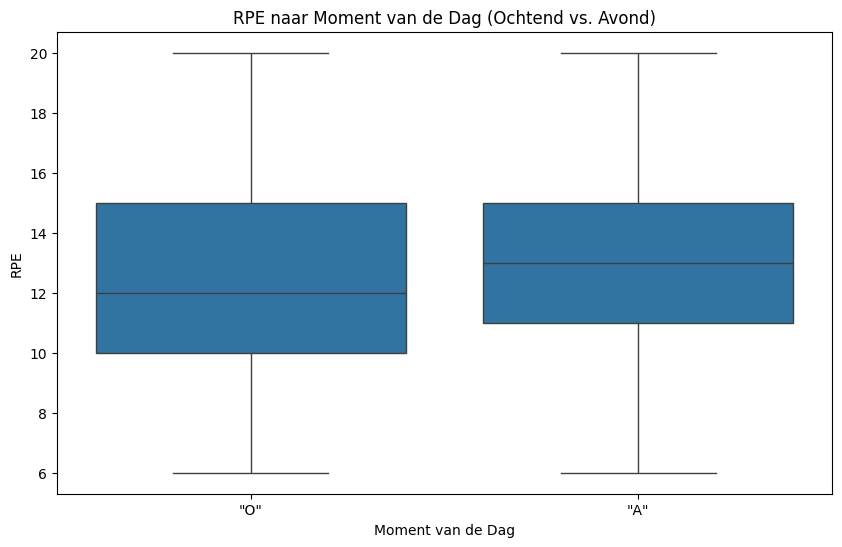

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'hardloop.tsv'

# Read the TSV file, specifying the date format for the 'DATES' column and handling quoting
df = pd.read_csv(file_path, sep='\t', dayfirst=True, infer_datetime_format=True, quoting=3, quotechar='"', na_values=['', '""'])

# Clean up column names by removing leading and trailing whitespaces and double quotes
df.columns = df.columns.str.strip().str.strip('"')

# Replace empty strings with NaN in the entire DataFrame
df.replace('', pd.NA, inplace=True)

# Drop rows with any missing values in the 'DATES' column
df = df.dropna(subset=['DATES'])

# Create a new column 'duration_tqr_pair' by combining 'DURATION' and 'TQR' columns
df['duration_tqr_pair'] = df['DURATION'].astype(str) + '_' + df['TQR'].astype(str)

# Group by 'duration_tqr_pair' and create a new column 'value_counts'
df['value_counts'] = df.groupby('duration_tqr_pair')['duration_tqr_pair'].transform('count')

# Fill NAs with 0s
df = df.fillna(0)

# Filter the DataFrame for RPE > 0
df_rpe_filtered = df[df['RPE'] > 0]

# Create a box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='MOMENT', y='RPE', data=df_rpe_filtered)
plt.title('RPE naar Moment van de Dag (Ochtend vs. Avond)')
plt.xlabel('Moment van de Dag')
plt.ylabel('RPE')
plt.show()


# De boxplot

Hier heb ik een grafiek gemaakt van de boxplot op basis van de inspanning op de moment van de dag hier zie je dat de gemiddelde inspanning s'ochtends 1 lager zit dan de avond. 


In [13]:
import pandas as pd

# Bestandsnamen
file1 = '/homes/jrgommers/hardlopen_data/blessures.tsv'
file2 = '/homes/jrgommers/hardlopen_data/hardloop.tsv'

# Inlezen van de datasets
df1 = pd.read_csv(file1, sep='\t')  # Assuming the file is a tab-separated file (tsv)
df2 = pd.read_csv(file2, sep='\t')

# Samenvatten van de datasets
summary_result_1 = df1.describe()
summary_result_2 = df2.describe()

# Afdrukken van de resultaten
print(summary_result_1)
print(summary_result_2)


       PERSON_ID   TIME_LOSS         ID
count  60.000000   59.000000  60.000000
mean   11.266667   56.152542  30.500000
std     6.617559   64.819594  17.464249
min     1.000000    7.000000   1.000000
25%     5.000000   13.000000  15.750000
50%    11.500000   34.000000  30.500000
75%    16.250000   63.000000  45.250000
max    24.000000  306.000000  60.000000
                TQR           RPE      DURATION         SLEEP    PERSON_ID  \
count  13227.000000  13228.000000  28063.000000  25784.000000  30323.00000   
mean      14.337870     12.757787     35.677369      5.105686     12.08327   
std        3.128276      3.128023     46.729298      4.392652      6.78762   
min        0.000000      0.000000      0.000000      0.000000      1.00000   
25%       13.000000     11.000000      0.000000      0.000000      6.00000   
50%       15.000000     13.000000      0.000000      8.000000     12.00000   
75%       17.000000     15.000000     60.000000      9.000000     18.00000   
max       20.000

## info describe data
Deze statistieken geven een overzicht van de centrale tendens, spreiding en verdeling van de variabelen in de dataset. Bovendien lijkt het erop dat de variabele 'TQR_OF_RPE' geen geldige waarnemingen heeft (alleen NaN-waarden)